In [1]:
import sqlite3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

In [3]:
#Imports
match_raw = pd.read_csv('Filter_Match.csv')
match = match_raw.copy()
#country_raw = pd.read_csv('Country.csv')
#country = country_raw.copy()
#league_raw = pd.read_csv('League.csv')
#league = league_raw.copy()
#player_raw = pd.read_csv('Player.csv', error_bad_lines=False)
#player = player_raw.copy()
# player_att_raw = pd.read_csv('Player_Attributes.csv')
# player_att = player_att_raw.copy()
#team_raw = pd.read_csv('Team.csv')
#team = team_raw.copy()
# team_att_raw = pd.read_csv('Team_Attributes.csv')
# team_att = team_att_raw.copy()

In [4]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
player = pd.read_sql_query("SELECT * FROM Player", cnx)
player_att = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
team_att = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)
matcho= pd.read_sql_query("SELECT * FROM Match", cnx)
country =pd.read_sql_query("SELECT * FROM Country", cnx)
league= pd.read_sql_query("SELECT * FROM League", cnx)
team=pd.read_sql_query("SELECT * FROM Team", cnx)

In [5]:
match.head()
for p in match.columns:
    print(p)

country_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
away_player_5
away_player_6
away_player_7
away_player_8
away_player_9
away_player_10
away_player_11


In [6]:
# Creating empty list to aggregate the values of iteration
result_list_home = []
result_list_away = []
points_list_home = []
points_list_away = []

# Iteration into match df
for index,row in match.iterrows():
    
    # Assemblying the iteration value with a variable
    home_team_goal = row['home_team_goal']
    away_team_goal = row['away_team_goal']
    home_team_api_id = row['home_team_api_id']
    away_team_api_id = row['away_team_api_id']
    match_api_id = row['match_api_id']
    
    # Contitional sentence
    if home_team_goal > away_team_goal:
        
        # Variable score_home receive 'won' string and score_away receive 'lost' string
        score_home = 'won'
        score_away = 'lost'
        
        # Variable points_home receive 3 points string and points_away receive 0 points
        points_home = 3
        points_away = 0
        
        # Appeding to the list
        result_list_home.append(score_home)
        result_list_away.append(score_away)
        
        # Appeding to the list
        points_list_home.append(points_home)
        points_list_away.append(points_away)
        
    elif home_team_goal < away_team_goal:
        
        # Variable score_home receive 'lost' string and score_away receive 'won' string
        score_home = 'lost'
        score_away = 'won'
        
        # Variable points_home receive 3 points string and points_away receive 0 points
        points_home = 0
        points_away = 3
        
        # Appeding to the list
        result_list_home.append(score_home)
        result_list_away.append(score_away)
        
        # Appeding to the list
        points_list_home.append(points_home)
        points_list_away.append(points_away)        
        
    else:
        
        # Variable score_home receive 'draw' string and score_away receive 'draw' string
        score_home = 'draw'
        score_away = 'draw'
        
        # Variable points_home receive 3 points string and points_away receive 0 points
        points_home = 1
        points_away = 1
        
        # Appeding to the list
        result_list_home.append(score_home)
        result_list_away.append(score_away)
        
        # Appeding to the list
        points_list_home.append(points_home)
        points_list_away.append(points_away)            

# Appending score list values to the match df new columns
match['home_team_result'] = result_list_home
match['away_team_result'] = result_list_away

# Appending score list values to the match df new columns
match['home_team_points'] = points_list_home
match['away_team_points'] = points_list_away

# Getting all the column names of the match df and transforming it into a list
cols_match = match.columns.tolist()

# Creating new list cols_match with main columns, home_team_result and away_team_result
cols_match = cols_match[0:9]+cols_match[-4:]+cols_match[9:-4]
match_1 = match.loc[:,cols_match]

In [7]:
match_1.head()

,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_result,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,10192,9931,1,2,lost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24558,2008/2009,1,2008-07-19 00:00:00,486264,9930,10179,3,1,won,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24558,2008/2009,1,2008-07-20 00:00:00,486265,10199,9824,1,2,lost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24558,2008/2009,1,2008-07-20 00:00:00,486266,7955,10243,1,2,lost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24558,2008/2009,2,2008-07-23 00:00:00,486267,9931,9956,1,0,won,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to obtain a consolidate match table with an improved table format, we will first divide it into 4 other tables (please see table below):

TABLE A
TABLE B
TABLE C
TABLE D
TABLE E
Each table has the main columns and the respective table column.

The next step is utilizing melt function to reshape these tables and finalize merging all these 3 tables into a 'consolidated match table'. For the sake of reliability of the merge, we will also create a team flag to assist this step, which indicates wheter we're refering to the home team or away team.

We will melt it with the following steps/order:

*  TABLE A: home_team_api_id / away_team_api_id --> match_api / match_api_id
* TABLE B: home_team_goal / away_team_goal --> team_goal / goals
* TABLE C: home_team_result / away_team_result --> team_result / result
* TABLE D: home_team_points / away_team_points --> team_points / points
* TABLE E: home_player_1..11 / away_player_1..11 --> player_desc / player_api_id

In [8]:
# 1. TABLE A: home_team_api_id / away_team_api_id --> match_api / match_api_id

## Getting all the column names of the match df and transforming it into the main list
## (columns that will not be reshaped)
cols = match.columns.tolist()
cols_main = cols[0:5]

## Creating new table A with main columns, home_team_api_id and away_team_api_id
match_a_1 = match.loc[:,'country_id':'away_team_api_id']

## Reshaping chosen fields of match df to TABLE A with melt function
match_a_2 = pd.melt(match_a_1, id_vars=cols_main, var_name='team_api', value_name='team_api_id')

## Creating team_flag in order to assist in the forthcoming merging process

### Indexing flags
row_indexes_home_a = match_a_2[match_a_2['team_api']=='home_team_api_id'].index
row_indexes_away_a = match_a_2[match_a_2['team_api']=='away_team_api_id'].index

### Assigning flags and reordering df
match_a_2.loc[row_indexes_home_a,'team_flag']="home_team"
match_a_2.loc[row_indexes_away_a,'team_flag']="away_team"


## -------------------------------------------------------------------------------------------- ##


# 2. TABLE B: home_team_goal / away_team_goal --> team_goal / goals

## Creating new table B with main columns, home_team_goal and away_team_goal
match_b_1 = match.loc[:,['country_id','season','stage','date','match_api_id','home_team_goal','away_team_goal']]

## Reshaping chosen fields of match df to TABLE B with melt function
match_b_2 = pd.melt(match_b_1, id_vars=cols_main, var_name='team_goal', value_name='team_goals')

## Creating team_flag in order to assist in the forthcoming merging process

## Indexing flags
row_indexes_home_b = match_b_2[match_b_2['team_goal']=='home_team_goal'].index
row_indexes_away_b = match_b_2[match_b_2['team_goal']=='away_team_goal'].index

## Assigning flags and reordering df
match_b_2.loc[row_indexes_home_b,'team_flag']="home_team"
match_b_2.loc[row_indexes_away_b,'team_flag']="away_team"


## -------------------------------------------------------------------------------------------- ##


# 3. TABLE C: home_team_result / away_team_result --> team_result / result

## Creating new table C with main columns, home_team_result and away_team_result
match_c_1 = match.loc[:,['country_id','season','stage','date','match_api_id','home_team_result','away_team_result']]

## Reshaping chosen fields of match df to TABLE B with melt function
match_c_2 = pd.melt(match_c_1, id_vars=cols_main, var_name='team_result', value_name='result')

## Creating team_flag in order to assist in the forthcoming merging process

## Indexing flags
row_indexes_home_c = match_c_2[match_c_2['team_result']=='home_team_result'].index
row_indexes_away_c = match_c_2[match_c_2['team_result']=='away_team_result'].index

## Assigning flags and reordering df
match_c_2.loc[row_indexes_home_c,'team_flag']="home_team"
match_c_2.loc[row_indexes_away_c,'team_flag']="away_team"



## -------------------------------------------------------------------------------------------- ##


# 3. TABLE D: home_team_points / away_team_points --> team_points / points

## Creating new table D with main columns, home_team_points and away_team_points
match_d_1 = match.loc[:,['country_id','season','stage','date','match_api_id','home_team_points','away_team_points']]

## Reshaping chosen fields of match df to TABLE B with melt function
match_d_2 = pd.melt(match_d_1, id_vars=cols_main, var_name='team_points', value_name='points')

## Creating team_flag in order to assist in the forthcoming merging process

## Indexing flags
row_indexes_home_d = match_d_2[match_d_2['team_points']=='home_team_points'].index
row_indexes_away_d = match_d_2[match_d_2['team_points']=='away_team_points'].index

## Assigning flags and reordering df
match_d_2.loc[row_indexes_home_d,'team_flag']="home_team"
match_d_2.loc[row_indexes_away_d,'team_flag']="away_team"


## -------------------------------------------------------------------------------------------- ##


# 4. TABLE E: home_player_1..11 / away_player_1..11 --> player_desc / player_api_id

## Getting all the column names of the match df and transforming it into a list
cols_e = match.columns.tolist()

## Creating new table E with main columns, home_player_1 .. 1 and away_player_1 .. 11
cols_e = cols_e[0:5]+cols_e[9:-2]
match_e_1 = match.loc[:,cols_e]

## Reshaping chosen fields of match df to TABLE E with melt function
match_e_2 = pd.melt(match_e_1, id_vars=cols_main, var_name='player_desc', value_name='player_api_id')

## Creating team_flag in order to assist in the forthcoming merge process

for number in range(1,12):
    
    ## Indexing flags
    ### Indexing home team flags
    row_index_home = match_e_2[match_e_2['player_desc']=='home_player_{}'.format(number)].index
    
    ### Indexing away team flags
    row_index_away = match_e_2[match_e_2['player_desc']=='away_player_{}'.format(number)].index
    
    ## Assigning flags
    ### Assign home team flags
    match_e_2.loc[row_index_home,'team_flag']="home_team"
    
    ### Assign away team flags
    match_e_2.loc[row_index_away,'team_flag']="away_team"

In [9]:
match_a_2

,country_id,season,stage,date,match_api_id,team_api,team_api_id,team_flag
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team
1,24558,2008/2009,1,2008-07-19 00:00:00,486264,home_team_api_id,9930,home_team
2,24558,2008/2009,1,2008-07-20 00:00:00,486265,home_team_api_id,10199,home_team
3,24558,2008/2009,1,2008-07-20 00:00:00,486266,home_team_api_id,7955,home_team
4,24558,2008/2009,2,2008-07-23 00:00:00,486267,home_team_api_id,9931,home_team
...,...,...,...,...,...,...,...,...
51953,24558,2015/2016,36,2016-05-25 00:00:00,1992225,away_team_api_id,9956,away_team
51954,24558,2015/2016,36,2016-05-25 00:00:00,1992226,away_team_api_id,10190,away_team
51955,24558,2015/2016,36,2016-05-25 00:00:00,1992227,away_team_api_id,10179,away_team
51956,24558,2015/2016,36,2016-05-25 00:00:00,1992228,away_team_api_id,10192,away_team


In [10]:
# Merge Table A with Table B
match_a_b = pd.merge(match_a_2, match_b_2, on = ['date','match_api_id','team_flag'], suffixes=('_x','_y'))

# Merge Table AB with Table C
match_a_b_c = pd.merge(match_a_b, match_c_2, on = ['date','match_api_id','team_flag'], suffixes=('_w','_z'))

# Merge Table ABC with Table D
match_a_b_c_d = pd.merge(match_a_b_c, match_d_2, on = ['date','match_api_id','team_flag'], suffixes=('_i','_j'))

# Merge Table ABCD with Table E
match_merged = pd.merge(match_a_b_c_d, match_e_2, on = ['date','match_api_id','team_flag'], suffixes=('_k','_l'))

match_merged.sort_values(by=["date", "match_api_id"]).head()

,country_id_x,season_x,stage_x,date,match_api_id,team_api,team_api_id,team_flag,country_id_y,season_y,...,country_id_j,season_j,stage_j,team_points,points,country_id,season,stage,player_desc,player_api_id
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,...,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_1,NaN
1,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,...,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_2,NaN
2,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,...,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_3,NaN
3,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,...,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_4,NaN
4,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,...,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_5,NaN


In [11]:
# The resulting table has a lot of redundant columns, we will discard them and 
# we will also reshape it to be ordained as we want

match_clean_1 = match_merged.loc[:,['country_id_x','season_x','stage_x','date','match_api_id',
                                    'team_flag','team_api_id','team_goals','result','points','player_api_id']]

match_clean_1.rename(index=str,columns={'country_id_x':'country_id','season_x':'season','stage_x':'stage'}, inplace=True)
match_clean_1.head()

,country_id,season,stage,date,match_api_id,team_flag,team_api_id,team_goals,result,points,player_api_id
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
1,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
2,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
3,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
4,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN


## Merge

In [12]:
# 1. Country --> League --> Match

## Merge Country --> League
league_merged_1 = pd.merge(league, country, left_on = 'country_id', right_on='id')
league_merged_1.loc[8,'name_x'] = 'Scotland Scottish Premiership'

## Removing redundant columns and reordering it
league_merged = league_merged_1.loc[:,['country_id','name_y','name_x']]
league_merged.rename(columns={'name_x': 'league', 'name_y': 'country'}, inplace=True)
league_merged['league'] = league_merged['league'].str.split(n=1,expand = True)[1]

## Merge League --> Match
match_clean_league_1 = pd.merge(match_clean_1, league_merged, on = 'country_id')
match_clean_league_2 = match_clean_league_1.iloc[:,[0,-2,-1,1,2,3,4,5,6,7,8,9,10]]


## -------------------------------------------------------------------------------------------- ##


# 2. Merge Team --> Match (home & away data)
match_clean_team_1 = pd.merge(match_clean_league_2, team, on = ['team_api_id'])

## Removing redundant columns and reordering it
match_clean_team_2 = match_clean_team_1.iloc[:,[0,1,2,3,4,5,6,7,8,-2,-1,9,10,11,12]]


## -------------------------------------------------------------------------------------------- ##


# 3. Merge Player 1 to 10 --> Match (home & away data)
match_clean_player_1 = pd.merge(match_clean_team_2, player, on = ['player_api_id'])

## Removing redundant columns and reordering it
match_clean_player_2 = match_clean_player_1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,-3,-2,-1]]
match_clean_player_3 = match_clean_player_2.sort_values(by=['date','match_api_id'])
match_clean_player_3.head()

,country_id,country,league,season,stage,date,match_api_id,team_flag,team_api_id,team_long_name,team_short_name,team_goals,result,points,player_api_id,player_name,birthday,height,weight
28712,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30823,Stephane Grichting,1979-03-30 00:00:00,185.42,176
41752,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30977,Dariusz Dudka,1983-12-09 00:00:00,182.88,185
53441,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,34037,Ireneusz Jelen,1981-04-09 00:00:00,182.88,163
69032,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,40714,Remy Riou,1987-08-06 00:00:00,187.96,179
69152,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,11323,Cedric Hengbart,1980-07-13 00:00:00,182.88,161


## Cleaning

In [13]:
# view missing value count for each feature
match_clean_player_3.isnull().sum()

country_id         0
country            0
league             0
season             0
stage              0
date               0
match_api_id       0
team_flag          0
team_api_id        0
team_long_name     0
team_short_name    0
team_goals         0
result             0
points             0
player_api_id      0
player_name        0
birthday           0
height             0
weight             0
dtype: int64

In [14]:
# drop rows with any null values in dataset
match_clean_player_3.dropna(axis=0, inplace=True)

# checks if any of columns have null values - should print False
match_clean_player_3.isnull().sum().any()

False

In [15]:
# print number of duplicates in match_clean dataset
sum(match_clean_player_3.duplicated())

# drop duplicates in datasets
match_clean_player_3.drop_duplicates(inplace=True)

# print number of duplicates again to confirm dedupe - should be 0
sum(match_clean_player_3.duplicated())

0

In [16]:
# Fixing date and bithday fields type
match_clean_player_3['date'] = pd.to_datetime(match_clean_player_3['date'])
match_clean_player_3['birthday'] = pd.to_datetime(match_clean_player_3['birthday'])

# Fixing player_api_id data type
match_clean_player_3['player_api_id'] = match_clean_player_3['player_api_id'].astype(int)
match_clean_player_3['match_year'] = match_clean_player_3.date.dt.year

## Getting all the column names of the match df and transforming it into a list
cols_match_player_3 = match_clean_player_3.columns.tolist()

## Creating consolidated main table
cols_match_player_3_1 = cols_match_player_3[0:6]+cols_match_player_3[-1:]+cols_match_player_3[6:-1]
match_clean_player_4 = match_clean_player_3.loc[:,cols_match_player_3_1]

match_clean_player_4.head()

,country_id,country,league,season,stage,date,match_year,match_api_id,team_flag,team_api_id,team_long_name,team_short_name,team_goals,result,points,player_api_id,player_name,birthday,height,weight
28712,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30823,Stephane Grichting,1979-03-30,185.42,176
41752,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30977,Dariusz Dudka,1983-12-09,182.88,185
53441,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,34037,Ireneusz Jelen,1981-04-09,182.88,163
69032,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,40714,Remy Riou,1987-08-06,187.96,179
69152,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,11323,Cedric Hengbart,1980-07-13,182.88,161


In [17]:
# Attributing a shorter and easiest variable name to Exploratory Data Analysis
df = match_clean_player_4.copy()

### Player Attributes


In [18]:
# view missing value count for each feature
player_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [19]:

# Taking a look into the missing data
null_data = player_att[player_att.isnull().any(axis=1)]
null_data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,None,_0,41.0,...,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,None,_0,41.0,...,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,None,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


In [20]:
player_att.dropna(axis=0, inplace=True)

# checks if any of columns have null values - should print False
player_att.isnull().sum().any()


# print number of duplicates in player_att dataset
sum(player_att.duplicated())

# drop duplicates in datasets
player_att.drop_duplicates(inplace=True)

# print number of duplicates again to confirm dedupe - should be 0
sum(player_att.duplicated())

0

In [21]:
# Fixing date field type - Player att
player_att['date'] = pd.to_datetime(player_att['date'])
player_att.loc[:,'crossing':] = player_att.loc[:,'crossing':].astype('int64')
player_att.loc[:,'overall_rating':'potential'] = player_att.loc[:,'overall_rating':'potential'].astype('int64')

In [22]:
# Consolidate dataframe
player_att_clean = player_att.copy()

### Team Attributes

In [23]:
team_att.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [24]:
# drop rows with any null values in dataset
team_att.drop(columns=['buildUpPlayDribbling'], inplace=True)

# checks if any of columns have null values - should print False
team_att.isnull().sum().any()

# drop duplicates in dataset
team_att.drop_duplicates(inplace=True)

# print number of duplicates again to confirm dedupe - should be 0
sum(team_att.duplicated())

0

In [25]:

# Fixing date field type - Team att
team_att['date'] = pd.to_datetime(player_att['date'])

In [26]:
team_att_clean = team_att.copy()

In [27]:
df_0809 = df[df['season'] == '2008/2009']
df_0910 = df[df['season'] == '2009/2010']
df_1011 = df[df['season'] == '2010/2011']
df_1112 = df[df['season'] == '2011/2012']
df_1213 = df[df['season'] == '2012/2013']
df_1314 = df[df['season'] == '2013/2014']
df_1415 = df[df['season'] == '2014/2015']
df_1516 = df[df['season'] == '2015/2016']

# Selecting each league
df_1415_bel = df_1415.groupby(['league']).get_group('Jupiler League')
df_1415_eng = df_1415.groupby(['league']).get_group('Premier League')
df_1415_fra = df_1415.groupby(['league']).get_group('Ligue 1')
df_1415_ger = df_1415.groupby(['league']).get_group('1. Bundesliga')
df_1415_ita = df_1415.groupby(['league']).get_group('Serie A')
df_1415_ned = df_1415.groupby(['league']).get_group('Eredivisie')
df_1415_pol = df_1415.groupby(['league']).get_group('Ekstraklasa')
df_1415_por = df_1415.groupby(['league']).get_group('Liga ZON Sagres')
df_1415_sco = df_1415.groupby(['league']).get_group('Scottish Premiership')
df_1415_esp = df_1415.groupby(['league']).get_group('LIGA BBVA')
df_1415_swi = df_1415.groupby(['league']).get_group('Super League')

#data to plot
match_counts = [df_0809['match_api_id'].nunique(), df_0910['match_api_id'].nunique(),
                df_1011['match_api_id'].nunique(), df_1112['match_api_id'].nunique(),
                df_1213['match_api_id'].nunique(), df_1314['match_api_id'].nunique(),
                df_1516['match_api_id'].nunique()]
df_match_counts = pd.DataFrame(match_counts)

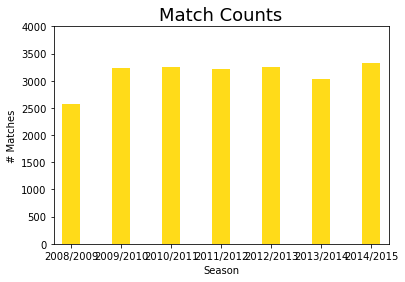

In [28]:
# Create plot
fig, ax = plt.subplots()
index = np.arange(len(match_counts))
objects = df['season'].unique()

# Plot axis
plt.axis((-0.35,6+0.35,0,4000))

bar_width = 0.35
opacity = 0.9

# Bar plot
rects1 = plt.bar(index, df_match_counts[0], bar_width, alpha = opacity, color = 'gold')

# Plot labels and title
plt.xlabel('Season')
plt.ylabel('# Matches')
plt.xticks(index, objects)
plt.title('Match Counts', fontdict={'fontsize':18})

# Graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#plt.grid(False)
plt.show()


In [29]:
team_att_clean

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2016-02-18,60,Balanced,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2015-11-19,52,Balanced,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-21,47,Balanced,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2015-03-20,70,Fast,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2007-02-22,47,Balanced,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2014-01-10,52,Balanced,Little,52,Mixed,Organised,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2013-09-20,54,Balanced,Little,51,Mixed,Organised,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-08-16,54,Balanced,Little,51,Mixed,Organised,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2013-06-07,54,Balanced,Normal,51,Mixed,Organised,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [30]:
id=player_att_clean.loc[player_att_clean['overall_rating'].idxmax(),'player_api_id']
player[player['player_api_id']==id]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6169,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


Tables:
- df (matches)
- player_att_clean
- player
- team_att_clean
- team

In [31]:
player_att_clean

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
2,3,218353,505942,2015-09-21,62,66,right,medium,medium,49,...,54,48,65,66,69,6,11,10,8,8
3,4,218353,505942,2015-03-20,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
4,5,218353,505942,2007-02-22,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30,83,85,right,medium,low,84,...,88,83,22,31,30,9,20,84,20,20
183974,183975,102359,39902,2009-02-22,78,80,right,medium,low,74,...,88,70,32,31,30,9,20,73,20,20
183975,183976,102359,39902,2008-08-30,77,80,right,medium,low,74,...,88,70,32,31,30,9,20,73,20,20
183976,183977,102359,39902,2007-08-30,78,81,right,medium,low,74,...,88,53,28,32,30,9,20,73,20,20


# Outliers

The main table we are using is **df**, which stores the information by team from all matches played between the 2008/2009 season and the 2015/2016 season. The only two numerical values of relevance are the number of goals scored and the points obtained from the match. It is also stored some information about the players who started in them, but we will treat them later in their own tables.

In [32]:
matches=df.drop_duplicates(['match_api_id','team_api_id'])

1.3602087482481375


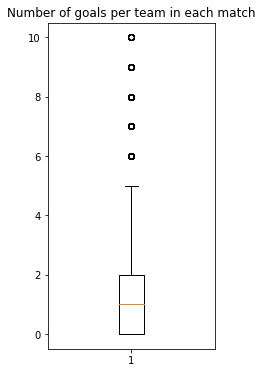

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,6))
plt.title('Number of goals per team in each match')
plt.boxplot(df['team_goals'])
print(np.mean(df['team_goals']))

As we can see, most of the teams score between $0$ and $2$ goals at each game (being $1.36$ the mean). Note that in the boxplot, it detects as outliers the matches in which a team scored $6$ or more goals. The maximum number of goals a team has scored in a match in our dataset is $10$.

We will not exclude these outliers from the dataset, as our intention is presenting the data, not predicting.

In [34]:
print(np.unique(df['points']))

[0 1 3]


As we expected, only the points corresponding to each possible outcome can be obtained (lose=0, draw=1, win=3).

Now we will focus on the players. First, we investigate the table with the personal data about each player (name, birthday, height, weight). This is stored in the table **player**.

Tallest player:
 id                                   5908
player_api_id                      148325
player_name              Kristof van Hout
player_fifa_api_id                 185306
birthday              1987-02-09 00:00:00
height                             208.28
weight                                243
Name: 5901, dtype: object
Shortest player:
 id                                   5453
player_api_id                       97226
player_name                    Juan Quero
player_fifa_api_id                 171126
birthday              1984-10-17 00:00:00
height                             157.48
weight                                117
Name: 5446, dtype: object
Heaviest player:
 id                                   5908
player_api_id                      148325
player_name              Kristof van Hout
player_fifa_api_id                 185306
birthday              1987-02-09 00:00:00
height                             208.28
weight                                243
Name: 5901, d

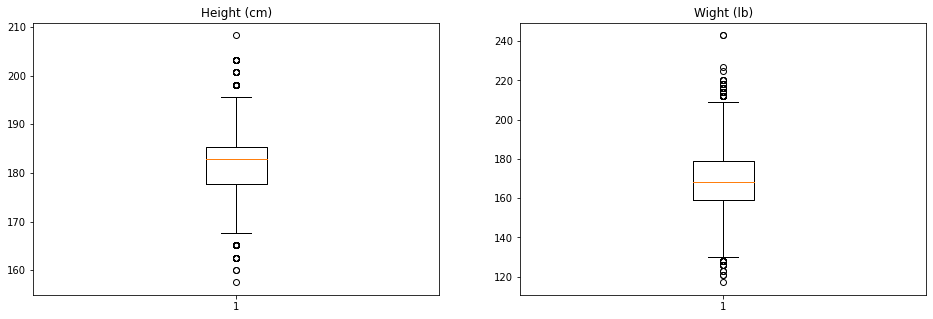

In [35]:
plt.subplot(1,2,1)
plt.boxplot(player['height'])
plt.title('Height (cm)')
plt.subplot(1,2,2)
plt.boxplot(player['weight'])
plt.title('Wight (lb)')
print('Tallest player:\n',player.loc[player['height'].idxmax()])
print('Shortest player:\n',player.loc[player['height'].idxmin()])
print('Heaviest player:\n',player.loc[player['weight'].idxmax()])
print('Lightest player:\n',player.loc[player['weight'].idxmin()])

All values seem to be real. Note that the tallest player is also the heaviest and the shortest player is also the lightest.

In the table **player_att_clean** there is data of the attributes of each player in the videogame FIFA. We will mostly focus on the overall rating and the potential.

Best player:
 6169    Lionel Messi
Name: player_name, dtype: object
Worst player:
 3460    Francesco Della Rocca
Name: player_name, dtype: object
Highest potential player:
 6169    Lionel Messi
Name: player_name, dtype: object
Lowest potential:
 7897    Nicola Madonna
Name: player_name, dtype: object


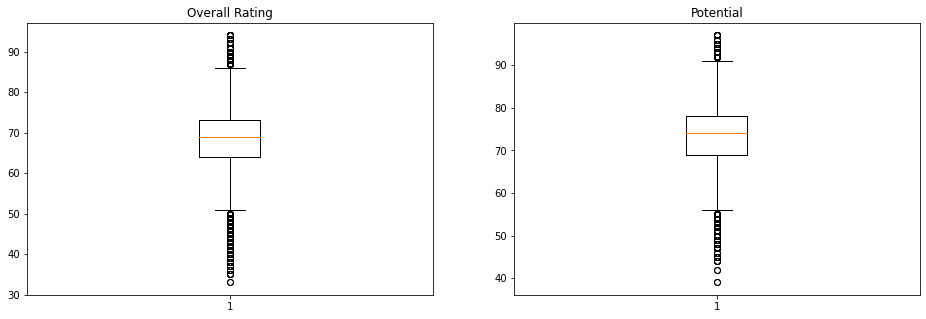

In [36]:
plt.subplot(1,2,1)
plt.boxplot(player_att_clean['overall_rating'])
plt.title('Overall Rating')
plt.subplot(1,2,2)
plt.boxplot(player_att_clean['potential'])
plt.title('Potential')

id=player_att_clean.loc[player_att_clean['overall_rating'].idxmax(),'player_api_id']
print('Best player:\n',player[player['player_api_id']==id]['player_name'])

id=player_att_clean.loc[player_att_clean['overall_rating'].idxmin(),'player_api_id']
print('Worst player:\n',player[player['player_api_id']==id]['player_name'])

id=player_att_clean.loc[player_att_clean['potential'].idxmax(),'player_api_id']
print('Highest potential player:\n',player[player['player_api_id']==id]['player_name'])

id=player_att_clean.loc[player_att_clean['potential'].idxmin(),'player_api_id']
print('Lowest potential:\n',player[player['player_api_id']==id]['player_name'])

Finally, we investigate the numerical values of the  table **team_att_clean**. These attributes measure different aspects of the style of play of each time. For example, **buildUpPlaySpeed** evaluates the speed in which a team constructs its offensive plays. 

Lowest chance creation shooting:
 94    FC Bayern Munich
Name: team_long_name, dtype: object Year: 2015-09-21 00:00:00


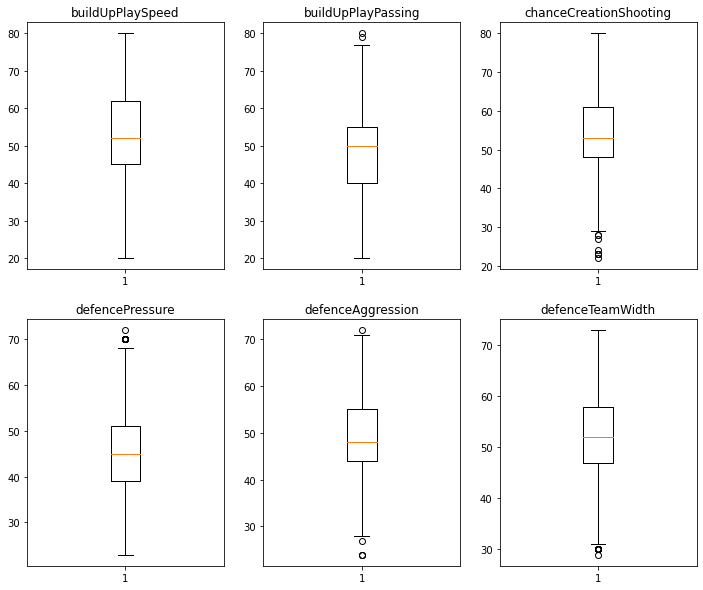

In [37]:
num_features=['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']
n = 1
plt.figure(figsize=(12,10))
for feature in num_features:
    plt.subplot(2,3,n)
    plt.title(feature)
    plt.boxplot(team_att_clean[feature])
    n+=1
id=team_att_clean.loc[team_att_clean['chanceCreationShooting'].idxmin(),'team_api_id']
print('Lowest chance creation shooting:\n',team[team['team_api_id']==id]['team_long_name'],'Year:',team_att_clean.loc[team_att_clean['chanceCreationShooting'].idxmin(),'date'] )

In this case there seems to be fewer outliers in general. An special case may be $\texttt{chanceCreationShooting}$, which measures the tendency that a team has to shoot once it approaches the opponent's area. The lowest value for this attribute is the **FC Bayern Munich** team of the 2015/2016 season, which is expected, given that **Pep Guardiola** was the manager at this point and his teams are known for their patience in the offensive side.

## 1st Graph: Which league has the most goals per game?

In [38]:
goals=matches.groupby(['league','season'],as_index=False).mean()[['league','season','team_goals']]
goals['match_goals']=2*goals['team_goals']
goals.to_csv('GoalsLeague.csv', index=False)


In [39]:
goals=pd.read_csv('GoalsLeague.csv')
goals

,league,season,team_goals,match_goals
0,1. Bundesliga,2008/2009,1.460784,2.921569
1,1. Bundesliga,2009/2010,1.415033,2.830065
2,1. Bundesliga,2010/2011,1.460784,2.921569
3,1. Bundesliga,2011/2012,1.429739,2.859477
4,1. Bundesliga,2012/2013,1.467320,2.934641
...,...,...,...,...
83,Super League,2011/2012,1.311728,2.623457
84,Super League,2012/2013,1.283333,2.566667
85,Super League,2013/2014,1.444444,2.888889
86,Super League,2014/2015,1.436111,2.872222


In [40]:
goal_last=goals[goals['season']=='2015/2016']

In [41]:
import altair as alt
topleague=['Ligue 1', '1. Bundesliga', 'Premier League', 'Eredivisie', 'LIGA BBVA', 'Serie A']

nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['season'], empty='none')

line = alt.Chart(goals).mark_line().encode(
    x=alt.X('season',title='Season'),
    y=alt.Y('match_goals:Q',scale=alt.Scale(domain=[2.2,3.4]),title='Goals per game'),
    color=alt.Color('league:N',scale=alt.Scale(domain=topleague))
)
selectors = alt.Chart(goals).mark_point().encode(
    x='season',
    opacity=alt.value(0),
).add_selection(
    nearest
)
labels=alt.Chart(goal_last).mark_text(align='left', dx=3).encode(
    alt.X('season'),
    alt.Y('match_goals:Q',scale=alt.Scale(domain=[2.2,3.4])),
    alt.Text('league'),
    alt.Color('league:N',legend=None,scale=alt.Scale(domain=topleague))
)
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'match_goals:Q', alt.value(' '), format='.2f')
)
rules = alt.Chart(goals).mark_rule(color='gray').encode(
    x='season',
).transform_filter(
    nearest
)
alt.layer(
    line, selectors, labels, points, rules, text
).properties(
    width=600, height=300,
    title='Goals per game over time in the top leagues'
)

alt.LayerChart(...)

## 2nd Graph: Effect of home advantage by league

In [42]:
adv=matches.groupby(['league','team_flag'],as_index=False).mean()[['league','team_flag','points']]
adv.sort_values(by='points',ascending=False)
adv.to_csv('HomeAdvantage.csv', index=False)

In [43]:
adv=pd.read_csv('HomeAdvantage.csv')
adv

,league,team_flag,points
0,1. Bundesliga,away_team,1.155637
1,1. Bundesliga,home_team,1.600490
2,Ekstraklasa,away_team,1.102636
3,Ekstraklasa,home_team,1.620864
4,Eredivisie,away_team,1.097191
5,Eredivisie,home_team,1.665626
6,Jupiler League,away_team,1.101316
7,Jupiler League,home_team,1.653947
8,LIGA BBVA,away_team,1.071382
9,LIGA BBVA,home_team,1.697039


In [44]:
palette = alt.Scale(domain=['home_team', 'away_team'],
                   range=['blue','red'])
alt.Chart(adv).mark_bar().encode(
    x=alt.X('points:Q',title= 'Average points'),
    y=alt.Y('team_flag:N',sort='-y',title='',axis=alt.Axis(labels=False)),
    color=alt.Color('team_flag:N',scale=palette,title=''),
    row=alt.Row('league:N',title='',
                      sort=alt.EncodingSortField("points", op='max',order='descending'),
                     header=alt.Header(labelAngle=0,labelAlign='left')),
    tooltip='points:Q'
).properties(
    height=25,
    title='Average points for home and away teams by league'
).configure_view(
    stroke='transparent'
)

alt.Chart(...)

## 2.1 Home advantage (goals)

In [45]:
adv=matches.groupby(['league','team_flag'],as_index=False).mean()[['league','team_flag','team_goals']]
adv.sort_values(by='team_goals',ascending=False)
adv

,league,team_flag,team_goals
0,1. Bundesliga,away_team,1.274918
1,1. Bundesliga,home_team,1.626634
2,Ekstraklasa,away_team,1.048233
3,Ekstraklasa,home_team,1.397644
4,Eredivisie,away_team,1.317432
5,Eredivisie,home_team,1.782434
6,Jupiler League,away_team,1.186184
7,Jupiler League,home_team,1.602632
8,LIGA BBVA,away_team,1.135855
9,LIGA BBVA,home_team,1.631250


In [46]:
palette = alt.Scale(domain=['home_team', 'away_team'],
                   range=['blue','red'])
alt.Chart(adv).mark_bar().encode(
    y=alt.Y('team_goals:Q',title= 'Average points'),
    x=alt.X('team_flag:N',sort='-x',title=''),
    color=alt.Color('team_flag:N',scale=palette,title=''),
    column=alt.Column('league:N',
                      sort=alt.EncodingSortField("team_goals", op='max',order='descending'), 
                     header=alt.Header(labelAngle=-90,labelAlign='right')),
    tooltip='team_goals:Q'
).properties(
    width=25,
    title='Average points for home and away teams'
)

alt.Chart(...)

## Preliminary graphs

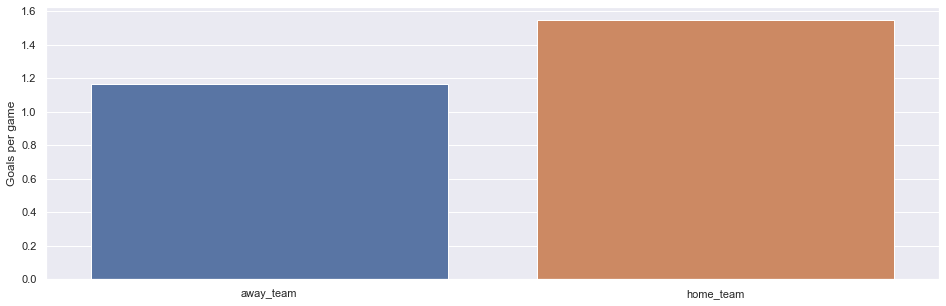

In [50]:
import seaborn as sns
adv=matches.groupby(['team_flag'],as_index=False).mean()[['team_flag','team_goals']]
sns.set()
ax=sns.barplot(x="team_flag", y="team_goals", data=adv)
ax.set(xlabel='', ylabel='Goals per game')
ax

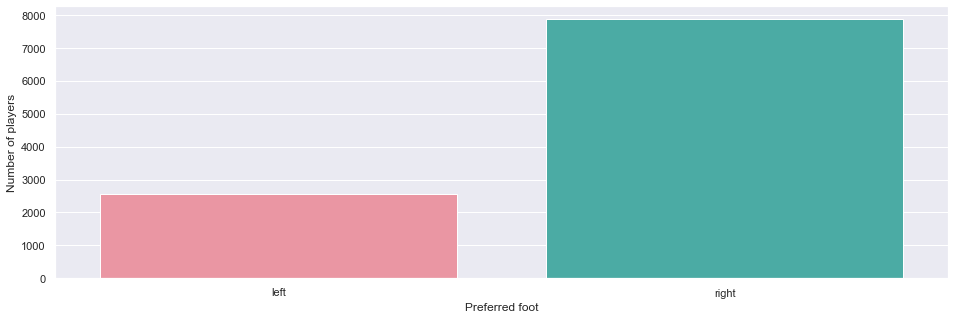

In [51]:
players=player_att_clean.drop_duplicates(['player_fifa_api_id'])
foot=players.groupby(['preferred_foot']).size()
sns.set()
sns.set_palette(sns.color_palette("BuGn",1))
ax=sns.barplot(x=['left','right'],y=foot)
ax.set(xlabel='Preferred foot', ylabel='Number of players')
ax

<ipython-input-52-e0a6c847cf57>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


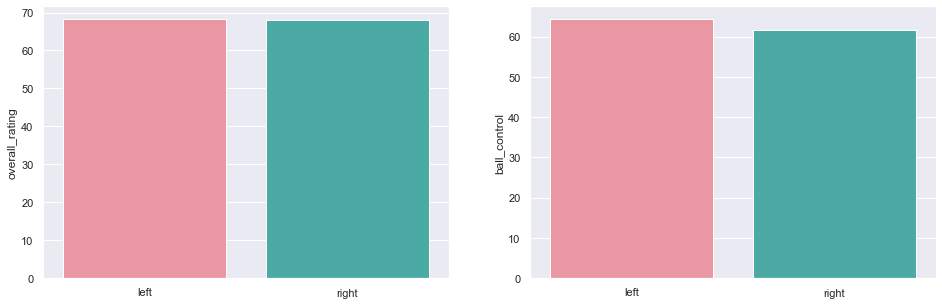

In [52]:
players=player_att_clean.drop_duplicates(['player_fifa_api_id'])
foot=players.groupby(['preferred_foot']).mean()[['overall_rating','ball_control']]
sns.set()
sns.set_palette(sns.color_palette("BuGn",1))
fig, ax =plt.subplots(1,2)
sns.barplot(x=['left','right'],y=foot['overall_rating'], ax=ax[0])
sns.barplot(x=['left','right'],y=foot['ball_control'], ax=ax[1])
fig.show()

In [53]:
players=player_att_clean.drop_duplicates(['player_fifa_api_id'])
foot=players.groupby(['preferred_foot']).mean()[['overall_rating','ball_control']]
foot

,overall_rating,ball_control
preferred_foot,,
left,68.188138,64.291045
right,68.143947,61.669125
